#  Data Analytics for House Pricing Data Set

In [77]:
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

## Import the required libraries

In [78]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [79]:
#!pip install -U scikit-learn

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# 1: Importing Data Sets

In [81]:
import piplite
await piplite.install('seaborn')

In [82]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [83]:
await download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv', "housing.csv")
file_name="housing.csv"

In [84]:
## Load the csv:

df = pd.read_csv("housing.csv")

In [85]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [86]:
#1 Display the data types of each column
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [87]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# 2: Data Wrangling

In [88]:
#2 Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data.

import pandas as pd

# Load your DataFrame
df = pd.read_csv('housing.csv')

# Drop the columns 'Unnamed: 0' and 'id' from the DataFrame
df.drop(columns=['Unnamed: 0', 'id'], axis=1, inplace=True)

 

In [89]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# 3: Exploratory Data Analysis

In [90]:
# Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a data frame.

# Count the number of houses with unique floor values
floor_counts = df['floors'].value_counts()

# Convert the result to a DataFrame
floor_counts_df = floor_counts.to_frame().reset_index()
floor_counts_df.columns = ['Floor', 'Count']  # Rename the columns

# Print the DataFrame
print(floor_counts_df)

   Floor  Count
0    1.0  10680
1    2.0   8241
2    1.5   1910
3    3.0    613
4    2.5    161
5    3.5      8


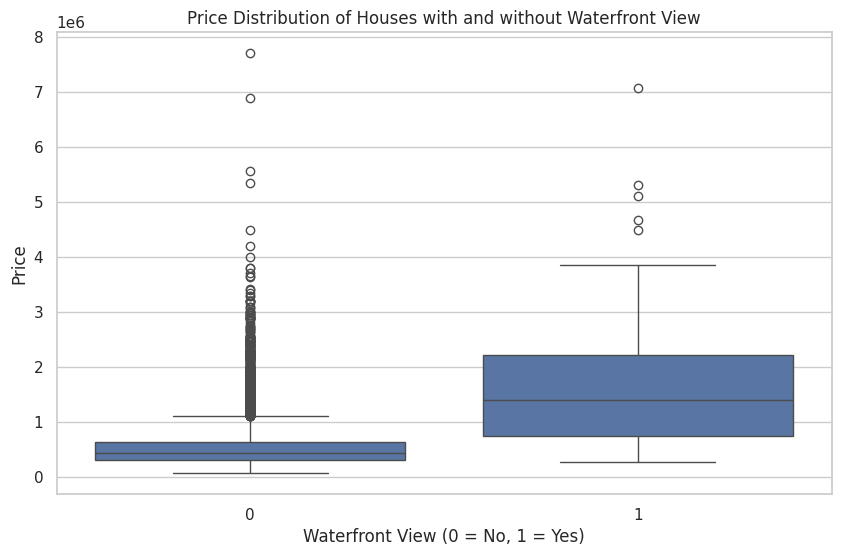

In [91]:
# Load your DataFrame
df = pd.read_csv('housing.csv')  # Replace 'your_file.csv' with your actual file name

# Initialize the Seaborn style
sns.set(style="whitegrid")

# Create a boxplot to compare the price distribution for houses with and without a waterfront view
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='waterfront', y='price', data=df)

# Set plot title and labels
boxplot.set_title('Price Distribution of Houses with and without Waterfront View')
boxplot.set_xlabel('Waterfront View (0 = No, 1 = Yes)')
boxplot.set_ylabel('Price')

# Show the plot
plt.show()

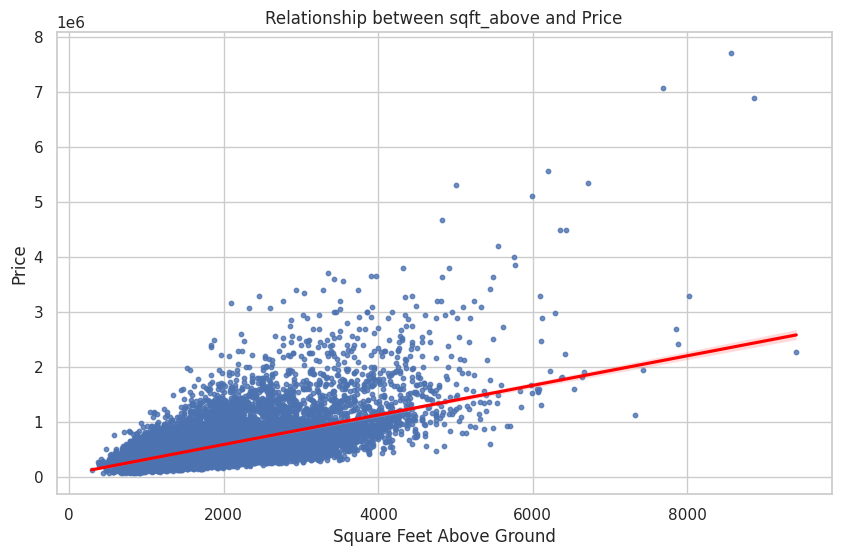

In [92]:
# Initialize the Seaborn style
sns.set(style="whitegrid")

# Create a regplot to visualize the relationship between sqft_above and price
plt.figure(figsize=(10, 6))
regplot = sns.regplot(x='sqft_above', y='price', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})

# Set plot title and labels
regplot.set_title('Relationship between sqft_above and Price')
regplot.set_xlabel('Square Feet Above Ground')
regplot.set_ylabel('Price')

# Show the plot
plt.show()

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[['sqft_living']]  # Feature
y = df['price']  # Target

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the target variable using the feature
y_pred = model.predict(X)

# Calculate the R^2 value
r2 = r2_score(y, y_pred)

# Print the R^2 value
print(f'R^2 value: {r2}')

R^2 value: 0.4928532179037931


#  4: Model Development

In [94]:
## We can Fit a linear regression model using the longitude feature 'long' and caculate the R^2.

X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [95]:
# Define the feature and target variables
X = df[['sqft_living']]
Y = df['price']

# Create and fit the model
lm = LinearRegression()
lm.fit(X, Y)

# Calculate and print the R^2 score
r2_score = lm.score(X, Y)
print(f'R^2 score: {r2_score}')

R^2 score: 0.4928532179037931


In [98]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv("housing.csv")

# Define the features and target variable
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
             "view", "bathrooms", "sqft_living15", "sqft_above",
             "grade", "sqft_living"]
X = df[features]
Y = df['price']

# Check for missing values
print("Missing values in features:\n", X.isnull().sum())
print("Missing values in target:\n", Y.isnull().sum())

# Handle missing values by imputing them with the mean (you can use other strategies too)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# You might also want to drop rows with missing target values
Y = Y.dropna()
X_imputed = X_imputed[Y.index]

# Create and fit the model
lm = LinearRegression()
lm.fit(X_imputed, Y)

# Calculate and print the R^2 score
r2_score = lm.score(X_imputed, Y)
print(f'R^2 score: {r2_score}')


Missing values in features:
 floors            0
waterfront        0
lat               0
bedrooms         13
sqft_basement     0
view              0
bathrooms        10
sqft_living15     0
sqft_above        0
grade             0
sqft_living       0
dtype: int64
Missing values in target:
 0
R^2 score: 0.6576823714968179


In [99]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [101]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
df = pd.read_csv("housing.csv")

# Define the features and target variable
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
             "view", "bathrooms", "sqft_living15", "sqft_above",
             "grade", "sqft_living"]
X = df[features]
Y = df['price']

# Create a pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),                # Standardize features
    ('regressor', LinearRegression())            # Fit the linear regression model
])

# Fit the pipeline
pipeline.fit(X, Y)

# Make predictions
predictions = pipeline.predict(X)

# Calculate and print the R^2 score
r2 = r2_score(Y, predictions)
print(f'R^2 score: {r2}')


R^2 score: 0.6576949118204805


# 5: Model Evaluation and Refinement

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


## We will split the data into training and testing sets:

In [105]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [109]:
from sklearn.linear_model import Ridge
from tqdm import tqdm  # Import tqdm for progress bar